In [99]:
import pandas as pd
import numpy as np

data = pd.read_csv('/Users/annaabildskov/Desktop/Documents/Polit/3. sem KA/Dyn. Prog/TP_local/Translated/1 Summary Statistics/Data/State.csv')
print(data.head())

    0  1  2  3
0  11  0  0  1
1  11  0  1  0
2  10  1  1  3
3   5  6  4  4
4   4  7  7  2


In [100]:
data.columns = ['Old', 'Both', 'New', 'PE']

In [101]:
print(data.head())

   Old  Both  New  PE
0   11     0    0   1
1   11     0    1   0
2   10     1    1   3
3    5     6    4   4
4    4     7    7   2


In [172]:
x = np.arange(1981, 1999, 1)
print(x)
xi = list(range(len(x)))

[1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994
 1995 1996 1997 1998]


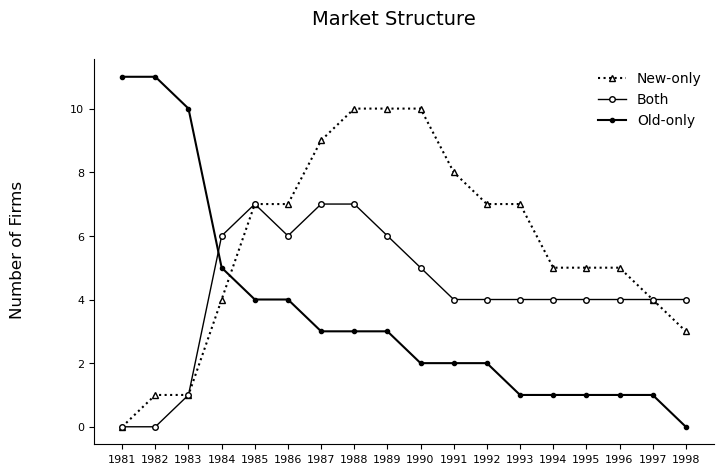

In [173]:
import matplotlib.pyplot as plt
import seaborn as sns

plot = plt.figure(figsize=(8, 5), dpi=100, facecolor='w')
plt.grid(False)
plot.suptitle('Market Structure', fontsize=14)
plot.supylabel('Number of Firms', fontsize=12)
sns.despine(offset=0)
plt.xticks(xi, x, fontsize=8)
plt.yticks(np.arange(0, 12, step=2), fontsize=8)
plt.plot(data['New'], label='New-only', color='black', linestyle='dotted', marker='^', ms=4, mfc='w')
plt.plot(data['Both'], label='Both', color='black', linestyle='solid', linewidth = 1, marker='o', ms=4, mfc='w')
plt.plot(data['Old'], label='Old-only', color='black', linestyle='solid', marker='.')
plt.legend(loc='upper right', fontsize=10, frameon=False)

In [104]:
price = pd.read_csv('/Users/annaabildskov/Desktop/Documents/Polit/3. sem KA/Dyn. Prog/TP_local/Translated/1 Summary Statistics/Data/P.csv')
price.columns = ['5.25-inch (Old)', '3.5-inch (New)']
print(price.head())

   5.25-inch (Old)  3.5-inch (New)
0         1.469200        0.000000
1         1.500000        0.759440
2         1.242085        0.629590
3         1.545505        0.573365
4         1.756436        0.521588


In [105]:
price = price * 1000
print(price.head())

   5.25-inch (Old)  3.5-inch (New)
0         1469.200           0.000
1         1500.000         759.440
2         1242.085         629.590
3         1545.505         573.365
4         1756.436         521.588


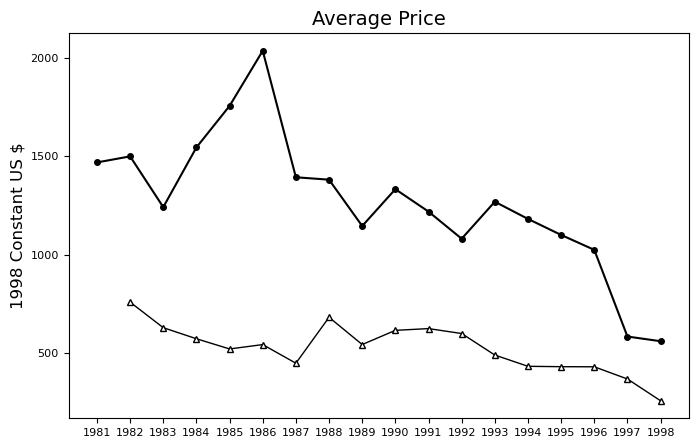

In [175]:
price = price.replace(0, np.nan)
plt.figure(figsize=(8, 5), dpi=100, facecolor='w')
plt.ylabel('1998 Constant US $', fontsize=12)
plt.title('Average Price', fontsize=14)
plt.xticks(xi, x, fontsize=8)
plt.yticks(np.arange(0, 3000, step=500), fontsize=8)
plt.plot(price['5.25-inch (Old)'], label='5.25-inch (Old)', color='black', linestyle='solid', marker='o', ms=4)
plt.plot(price['3.5-inch (New)'], label='3.5-inch (New)', color='black', linestyle='solid', linewidth = 1, marker='^', ms=4, mfc='w')

In [205]:
quantity = pd.read_csv('/Users/annaabildskov/Desktop/Documents/Polit/3. sem KA/Dyn. Prog/TP_local/Translated/1 Summary Statistics/Data/Q.csv')
quantity.columns = ['Old', 'New', 'Percentage']
quantity['Old'] = quantity['Old'] / 1000
quantity['New'] = quantity['New'] / 1000
quantity['Percentage'] = quantity['Percentage'] /100
print(quantity.head())

        Old     New  Percentage
0  0.049798  0.0000    0.006025
1  0.214900  0.0015    0.011000
2  1.123200  0.0015    0.202000
3  2.468100  0.0673    0.433000
4  3.071100  0.3386    0.767000


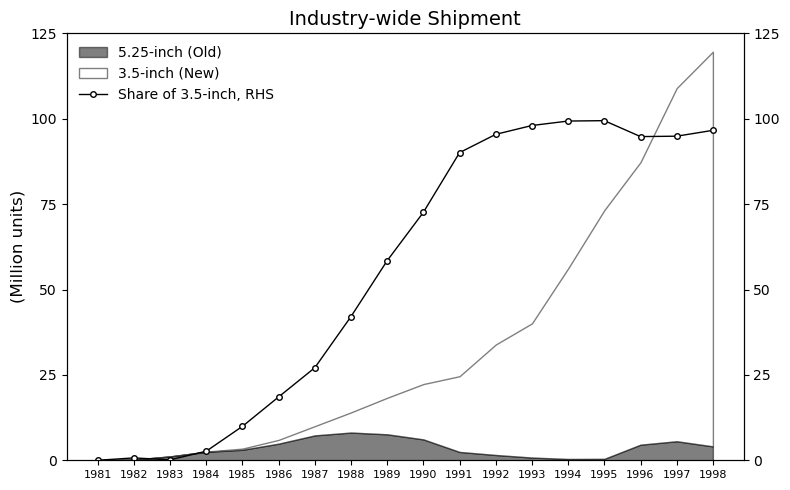

In [206]:
percentage = quantity['New'] / (quantity['New'] + quantity['Old']) * 100

# First axis for quantity shipped
fig, ax1 = plt.subplots(figsize=(8, 5), dpi=100, facecolor='w')
ax1.set_ylabel('(Million units)', fontsize=12)
ax1.stackplot(xi,quantity['Old'], quantity['New'], labels=['5.25-inch (Old)', '3.5-inch (New)'], colors=['black', 'white'], edgecolor='black', alpha=0.5)
ax1.set_ylim(0, 125)
ax1.set_yticks(np.arange(0, 126, step=25))
#ax1.set_xlim(1981, 1998)
#ax1.set_xticks(np.arange(1981, 1998, step=2))
ax1.set_xticks(xi, x, fontsize=8)

# Second axis for percentage
ax2 = ax1.twinx()
ax2.plot(xi, percentage, label='Share of 3.5-inch, RHS', color='black', linestyle='solid', linewidth = 1, marker='o', ms=4, mfc='w')
ax2.set_ylim(0, 125)
ax2.set_yticks(np.arange(0, 126, step=25))

# Get legend handles and labels from both axes
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

# Combine and place in one location
ax1.legend(handles1 + handles2, labels1 + labels2, loc='upper left', fontsize=10, frameon=False)

plt.title('Industry-wide Shipment', fontsize=14)
plt.tight_layout()

In [202]:
1.107900000000000e+03

1107.9